<a href="https://colab.research.google.com/github/roshni2001/Tools-Project/blob/main/Loan_Approvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Load the Dataset

In [ ]:
data=pd.read_csv("/content/loan_approval_dataset.csv")

#Preprocessing and Data Inspection

**CHECK FOR MISSING VALUES**

In [ ]:
# Check for null values
print(data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


**DATASET SIZE**

In [ ]:
data.shape

(4269, 13)

**Analyzing both numeric and object series and also the DataFrame column sets of mixed data type**

In [ ]:
# Display dataset statistics
print(data.describe())

           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

**Remove leading spaces from column names**

In [ ]:

data.columns = data.columns.str.lstrip()

**Display unique values in categorical columns**

In [ ]:

categorical_cols = ['education', 'self_employed', 'loan_status']
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in education: [' Graduate' ' Not Graduate']
Unique values in self_employed: [' No' ' Yes']
Unique values in loan_status: [' Approved' ' Rejected']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['education'] = label_encoder.fit_transform(data['education'])  # Graduate=0, Not Graduate=1
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])  # No=0, Yes=1
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])  # Approved=1, Rejected=0

data.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


**Checking Correlation using Heatmap**

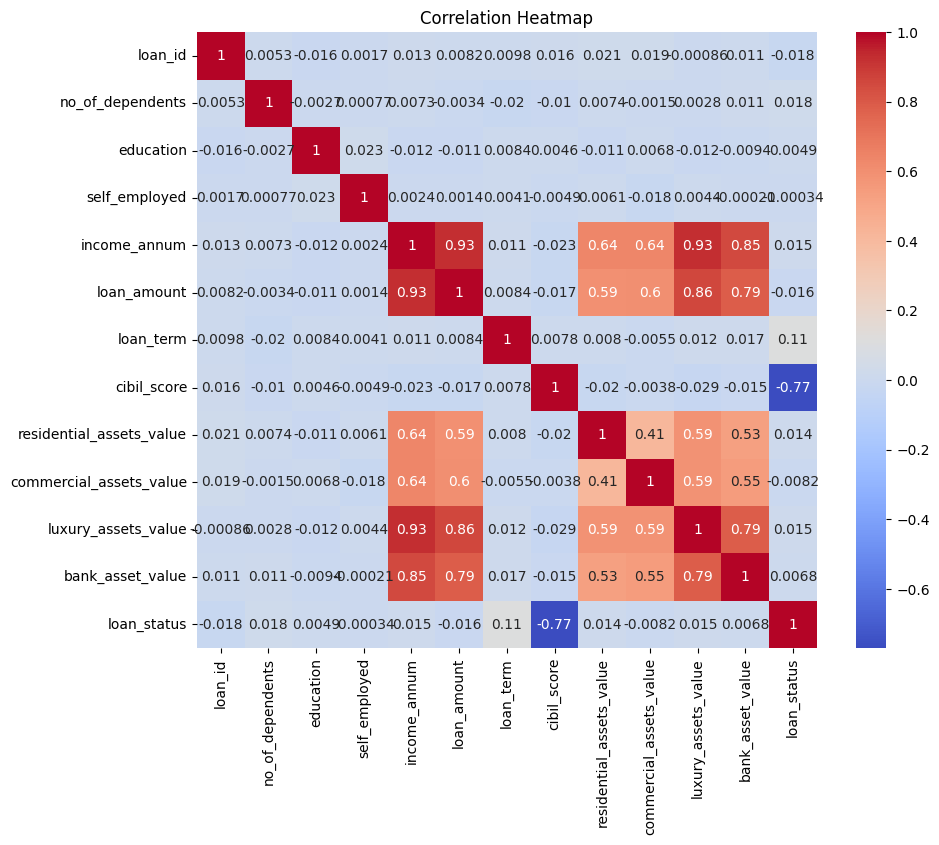

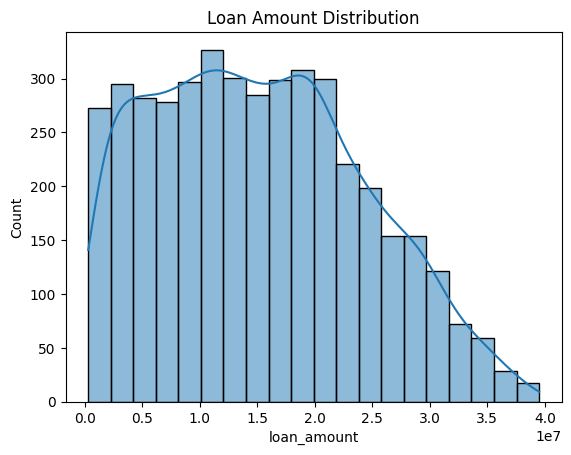

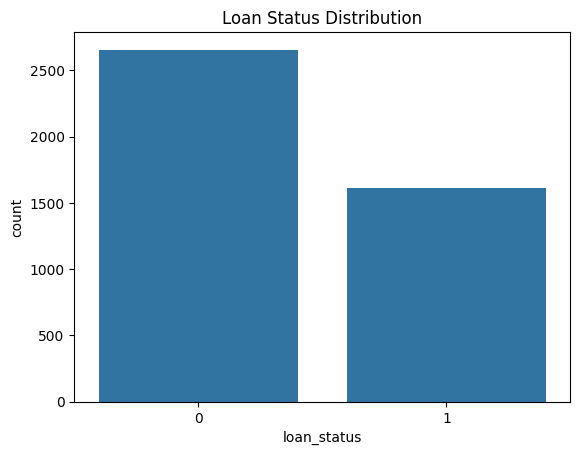

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Loan Amount
sns.histplot(data['loan_amount'], kde=True, bins=20)
plt.title("Loan Amount Distribution")
plt.show()

# Categorical distribution for loan status
sns.countplot(x='loan_status', data=data)
plt.title("Loan Status Distribution")
plt.show()


**Outlier Detection**

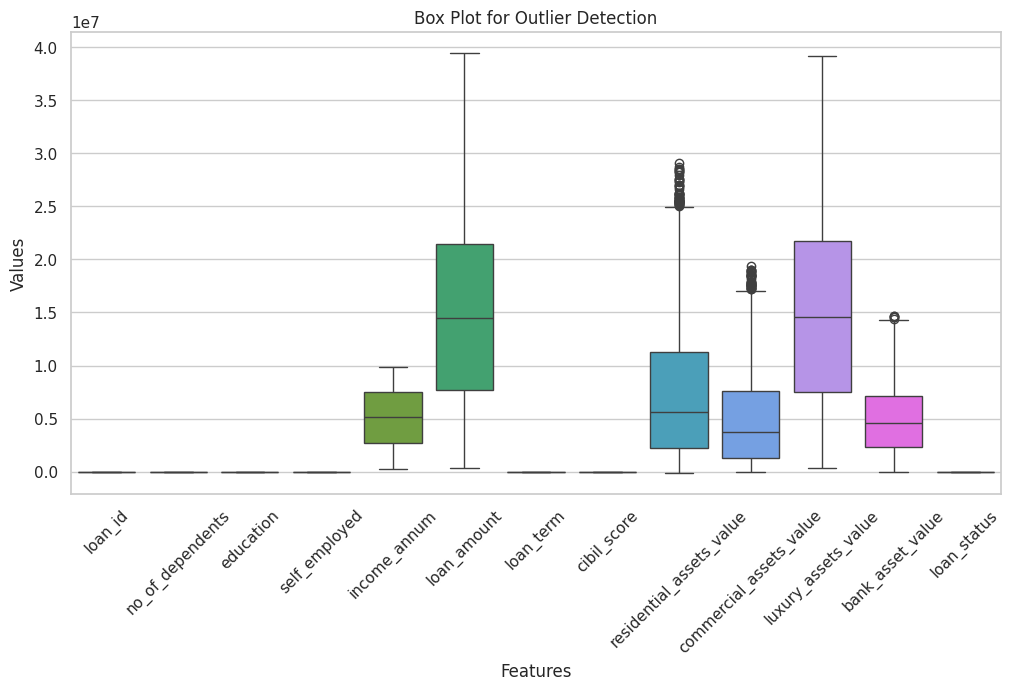

In [ ]:
import matplotlib.pyplot as plt
numerical_cols = ['income_annum','cibil_score', 'loan_amount','residential_assets_value' ,'commercial_assets_value','luxury_assets_value','bank_asset_value']
# Create a boxplot
# sns.boxplot(data=numerical_cols)

# # Display the plot
# plt.show()
# Set the aesthetics for the plots

sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


**Removing Outliers using IQR**

In [ ]:
# Define numerical columns
numerical_cols = ['income_annum','cibil_score', 'loan_amount','residential_assets_value' ,'commercial_assets_value','luxury_assets_value','bank_asset_value']
# IQR calculation
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
outliers = (data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))
data_cleaned = data[~outliers.any(axis=1)]

print(f"Data shape after outlier removal: {data_cleaned.shape}")


Data shape after outlier removal: (4178, 13)


**Visulazing after oulier Removal**

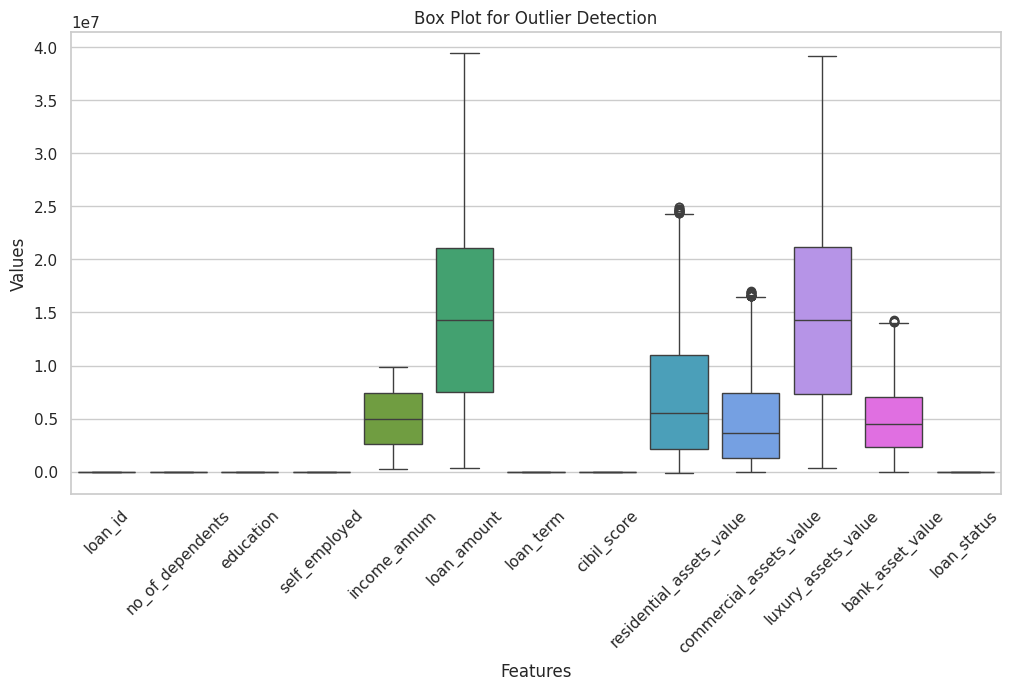

In [ ]:
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned)
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


#Recursive Feature Elimination
**To select important features**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = data_cleaned.drop(['loan_id', 'loan_status'], axis=1)
y = data_cleaned['loan_status']

# Recursive Feature Elimination
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'luxury_assets_value'],
      dtype='object')


#Train Models (Random Forest and XGBoost)

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Ensemble Learning**

***Combine predictions from both models***

In [ ]:
import numpy as np

# Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Ensemble Predictions (Majority Voting)
final_preds = np.where((rf_preds + xgb_preds) >= 1, 1, 0)


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, final_preds))
print("Precision:", precision_score(y_test, final_preds))
print("Recall:", recall_score(y_test, final_preds))
print("F1 Score:", f1_score(y_test, final_preds))


Accuracy: 0.9832535885167464
Precision: 0.963076923076923
Recall: 0.9936507936507937
F1 Score: 0.978125


#Train and Evaluate Random Forest (RF)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1_score = f1_score(y_test, rf_preds)

# Display Random Forest evaluation metrics
print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1_score:.4f}")


Random Forest Evaluation Metrics:
Accuracy: 0.9833
Precision: 0.9659
Recall: 0.9905
F1 Score: 0.9781


#Train and Evaluate XGBoost (XGB)

In [ ]:
# Train XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1_score = f1_score(y_test, xgb_preds)

# Display XGBoost evaluation metrics
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1_score:.4f}")



XGBoost Evaluation Metrics:
Accuracy: 0.9892
Precision: 0.9811
Recall: 0.9905
F1 Score: 0.9858


In [ ]:
data_cleaned.shape

(4178, 13)

#Alternative methodology

**DATA AUGMENTATION USING SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = data.drop(['loan_id', 'loan_status'], axis=1)  # Exclude target and non-predictive columns
y = data['loan_status']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data back into a DataFrame
augmented_data_smote = pd.DataFrame(X_resampled, columns=X.columns)
augmented_data_smote['loan_status'] = y_resampled

# Check the new dataset size
print(f"New dataset size after SMOTE: {augmented_data_smote.shape[0]}")


New dataset size after SMOTE: 5312


**RANDOM SAMPLING (Over-sampling)**

In [ ]:
# Function to create larger dataset by random sampling
def increase_dataset_size(df, target_size=12000):
    # Calculate how many times to duplicate the data
    num_duplicates = (target_size // df.shape[0]) + 1
    augmented_df = pd.concat([df] * num_duplicates, ignore_index=True)
    return augmented_df.iloc[:target_size, :]

# Increase dataset size to ~12,000
augmented_data_random = increase_dataset_size(data, target_size=12000)

# Check the size of the augmented dataset
print(f"New dataset size: {augmented_data_random.shape[0]}")


New dataset size: 12000


**DATASET SIZE AFTER AUGMENTATION**

In [ ]:
augmented_data_random.shape

(12000, 13)

In [ ]:
pip install pytorch-tabnet scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.6 MB/s eta 0:00:00


**HYBRID MODEL (TABNET+RF)**

In [ ]:
# Import libraries
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
import joblib  # For saving and loading models

# Step 1: Prepare the augmented dataset (12,000 instances)
# Assuming the augmented dataset is stored in data_combined
# Update X and y with the augmented data
X = augmented_data_random.drop(['loan_id', 'loan_status'], axis=1)  # Drop non-predictive columns
y = augmented_data_random['loan_status']  # Target variable

# Step 2: Create the train-test split (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: TabNet Configuration
tabnet = TabNetClassifier(
    seed=42,
    verbose=1,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2)
)

# Create Stratified K-Fold cross-validation (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# TabNet Training and Evaluation
best_epoch = 0
best_test_accuracy = 0
best_rf_model = None

# Training Loop for Stratified K-Fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full)):
    print(f"\n=== Fold {fold + 1} ===")

    # Split data into training and validation sets for this fold
    X_resampled, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_resampled, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    # Train TabNet
    tabnet.fit(
        X_resampled.values, y_resampled.values,  # Convert to NumPy arrays
        eval_set=[(X_resampled.values, y_resampled.values), (X_val.values, y_val.values)],  # Convert to NumPy arrays
        eval_name=['train', 'val'],
        eval_metric=['accuracy'],
        max_epochs=100,
        patience=10,
        batch_size=256
    )

    # Extract TabNet feature embeddings
    train_embeddings = tabnet.predict_proba(X_resampled.values)
    val_embeddings = tabnet.predict_proba(X_val.values)
    test_embeddings = tabnet.predict_proba(X_test.values)  # Ensure X_test is defined

    # Train Random Forest on TabNet embeddings
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(train_embeddings, y_resampled)

    # Evaluate on validation set (within this fold)
    y_val_pred = rf.predict(val_embeddings)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy (Fold {fold + 1}): {val_accuracy}")

    # Evaluate on holdout test set (X_test)
    y_test_pred = rf.predict(test_embeddings)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy (Fold {fold + 1}): {test_accuracy}")

    # Save the best model and its test accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_epoch = fold + 1
        best_rf_model = rf
        joblib.dump(rf, "best_rf_model.pkl")  # Save the RF model
        tabnet.save_model("best_tabnet_model")  # Save the TabNet model

# Summary of the best model
print(f"\nBest Test Accuracy: {best_test_accuracy} at Fold {best_epoch}")

# Step 4: Validate Saved Model Reproduction
print("\n=== Validation of Saved Model ===")
# Load saved models
loaded_tabnet = TabNetClassifier()
loaded_tabnet.load_model("best_tabnet_model.zip")
loaded_rf = joblib.load("best_rf_model.pkl")

# Generate embeddings using the saved TabNet model
saved_test_embeddings = loaded_tabnet.predict_proba(X_test.values)

# Evaluate Random Forest on saved embeddings
saved_test_pred = loaded_rf.predict(saved_test_embeddings)
saved_test_accuracy = accuracy_score(y_test, saved_test_pred)
print(f"Reproduced Test Accuracy: {saved_test_accuracy}")

# Ensure reproducibility
assert np.isclose(best_test_accuracy, saved_test_accuracy), "Mismatch in reproduced accuracy!"
print("Reproduced accuracy matches the best recorded accuracy.")



=== Fold 1 ===
epoch 0  | loss: 0.33951 | train_accuracy: 0.62331 | val_accuracy: 0.6224  |  0:00:03s
epoch 1  | loss: 0.15585 | train_accuracy: 0.62044 | val_accuracy: 0.62031 |  0:00:05s
epoch 2  | loss: 0.12208 | train_accuracy: 0.65378 | val_accuracy: 0.6474  |  0:00:10s
epoch 3  | loss: 0.12144 | train_accuracy: 0.73672 | val_accuracy: 0.73646 |  0:00:12s
epoch 4  | loss: 0.12175 | train_accuracy: 0.78958 | val_accuracy: 0.79479 |  0:00:13s
epoch 5  | loss: 0.11323 | train_accuracy: 0.83333 | val_accuracy: 0.83542 |  0:00:14s
epoch 6  | loss: 0.10807 | train_accuracy: 0.86523 | val_accuracy: 0.86562 |  0:00:15s
epoch 7  | loss: 0.11181 | train_accuracy: 0.88971 | val_accuracy: 0.89271 |  0:00:17s
epoch 8  | loss: 0.10924 | train_accuracy: 0.90768 | val_accuracy: 0.90833 |  0:00:18s
epoch 9  | loss: 0.10792 | train_accuracy: 0.90898 | val_accuracy: 0.90833 |  0:00:19s
epoch 10 | loss: 0.10956 | train_accuracy: 0.92878 | val_accuracy: 0.92188 |  0:00:20s
epoch 11 | loss: 0.11181 | 

**VISUALIZATION GRAPHS FOR TRAINING LOSS, VALIDATION & TEST ACCURACIES**

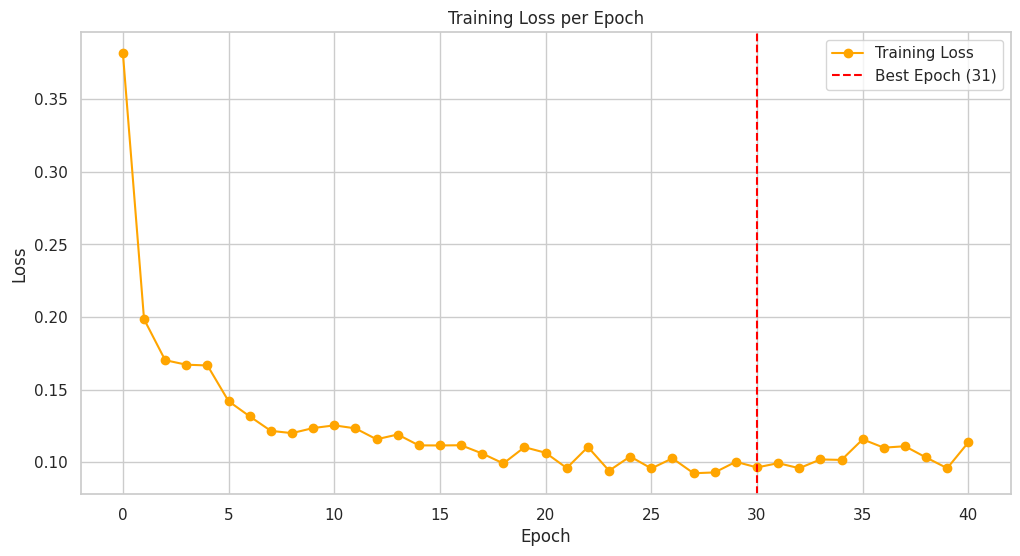

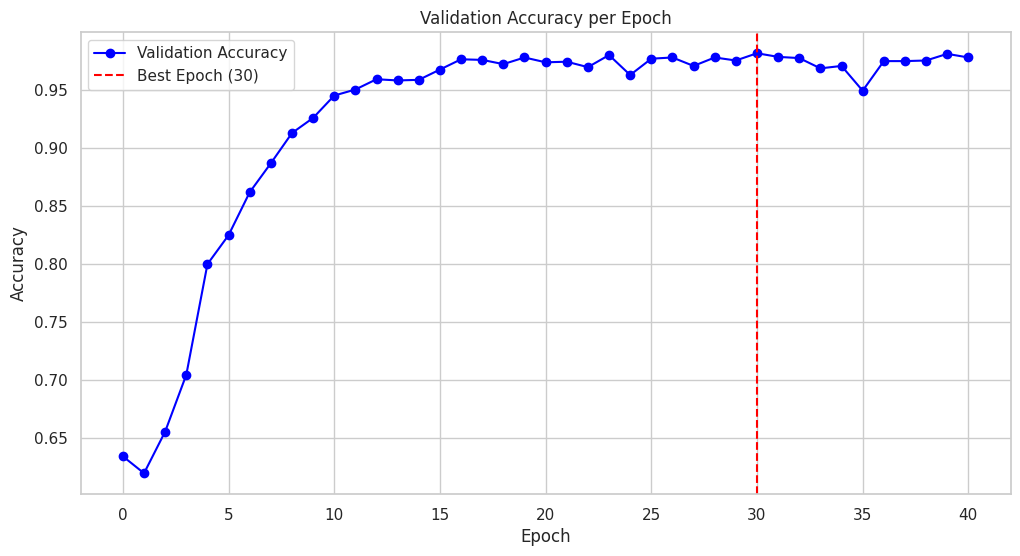

Best Validation Accuracy: 0.9818 at Epoch 31
Test Accuracy: 0.9729


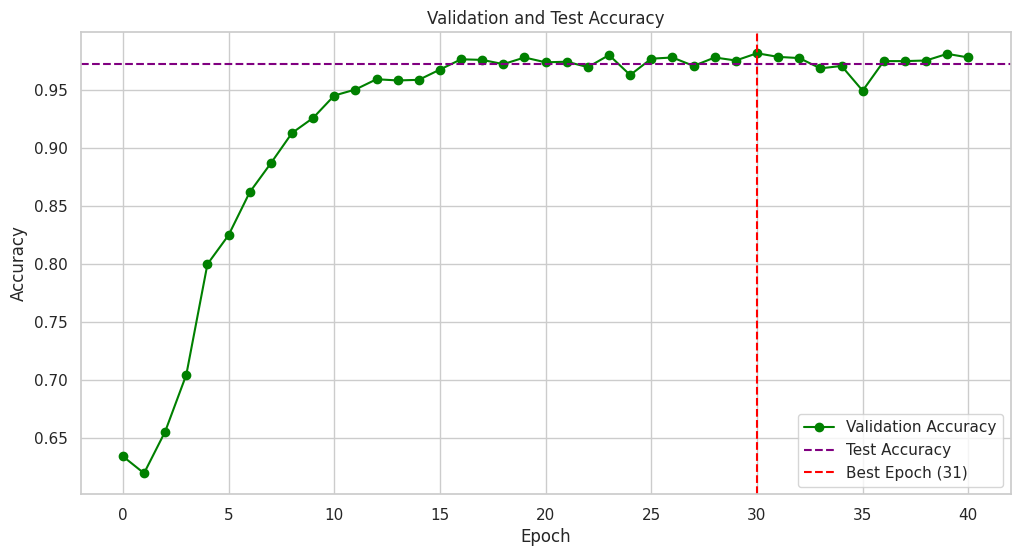

In [ ]:
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure `X_test` is a NumPy array (TabNet does not accept Pandas DataFrame)
X_test_np = X_test.values  # Convert from DataFrame to NumPy array

# Ensure `history` exists
try:
    history = tabnet.history  # Retrieve training history
    epochs = len(history['loss'])  # Total number of epochs
except AttributeError:
    raise ValueError("`tabnet.history` is not available. Ensure training metrics were logged.")

# Extract training loss and validation accuracy
train_losses = history['loss']
val_accuracies = history['val_accuracy']

# Identify the best epoch based on validation accuracy
best_epoch = np.argmax(val_accuracies)
best_val_accuracy = val_accuracies[best_epoch]

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_losses, label="Training Loss", marker='o', color='orange')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='blue')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch})")
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Test the model on the test set
test_preds = tabnet.predict(X_test_np)  # Use NumPy array
test_accuracy = accuracy_score(y_test, test_preds)

# Print Best Validation Accuracy and Test Accuracy
print(f"Best Validation Accuracy: {best_val_accuracy:.4f} at Epoch {best_epoch + 1}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot Validation and Test Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='green')
plt.axhline(test_accuracy, color='purple', linestyle='--', label="Test Accuracy")
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


**FEATURE LEVEL IMPORTANCE**

TabNet Feature Importances:
no_of_dependents: 0.0702
education: 0.0283
self_employed: 0.0590
income_annum: 0.0097
loan_amount: 0.0311
loan_term: 0.1226
cibil_score: 0.6625
residential_assets_value: 0.0001
commercial_assets_value: 0.0130
luxury_assets_value: 0.0029
bank_asset_value: 0.0006


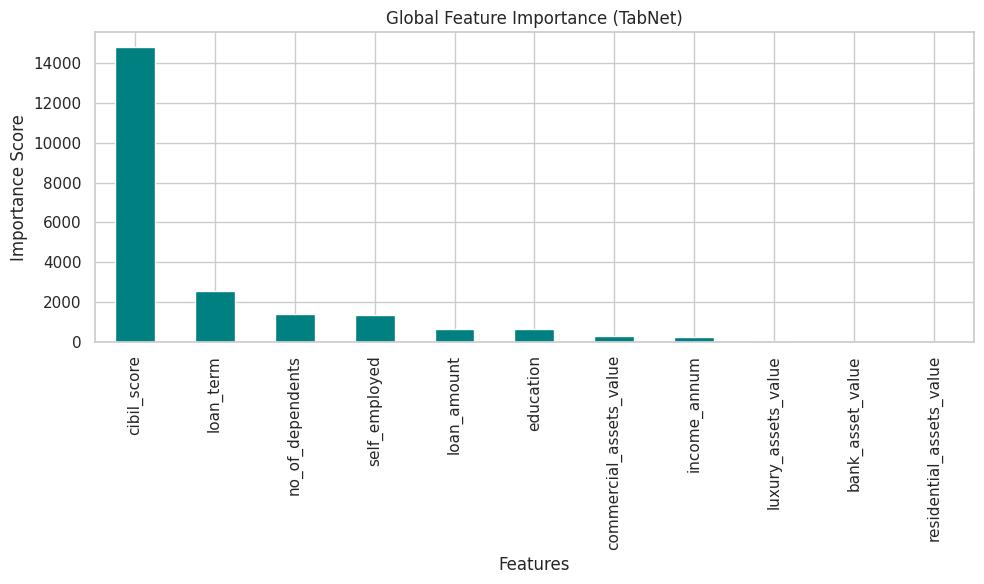

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate explanations for the test dataset using TabNet
explanations = tabnet.explain(X_test.values)

# Print feature importances from TabNet
print("TabNet Feature Importances:")
feature_importance_tabnet = tabnet.feature_importances_
for name, importance in zip(X.columns, feature_importance_tabnet):
    print(f"{name}: {importance:.4f}")

# Step 1: Extract the feature importance array from the explanations tuple
# Shape: (number of samples in X_test, number of features)
feature_importance_array = explanations[0]

# Step 2: Aggregate feature importances across all samples
# Summing across rows to get global feature importance
global_feature_importance = np.sum(feature_importance_array, axis=0)

# Step 3: Map aggregated feature importances to feature names
feature_names = X.columns  # Ensure this matches the original feature names
feature_importance_series = pd.Series(global_feature_importance, index=feature_names)

# Step 4: Sort feature importances for visualization
feature_importance_sorted = feature_importance_series.sort_values(ascending=False)

# Step 5: Plot global feature importance
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar', color='teal', title="Global Feature Importance (TabNet)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


**INSTANCE LEVEL EXPLAINATION**

In [ ]:
sample_index = 0  # Index of the instance you want to explain
instance_importance = np.sum(explanations[sample_index], axis=0)  # Aggregate across steps

# Map feature importance to feature names
instance_importance = pd.Series(instance_importance, index=feature_names)
instance_importance = instance_importance.sort_values(ascending=False)
print(instance_importance)

cibil_score                 14800.165663
loan_term                    2552.886122
no_of_dependents             1419.138729
self_employed                1326.621661
loan_amount                   661.403117
education                     646.216136
commercial_assets_value       301.860473
income_annum                  221.973471
luxury_assets_value            62.076665
bank_asset_value               13.769802
residential_assets_value        2.835440
dtype: float64


**TABNET MODEL (STANDALONE)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving and loading the model

# Step 1: Preprocessing and Dataset Preparation
# Assuming `data_combined` is your augmented dataset
X = augmented_data_random.drop(['loan_id', 'loan_status'], axis=1)  # Features
y = augmented_data_random['loan_status']  # Target

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Define TabNet Classifier
tabnet = TabNetClassifier(
    seed=42,
    verbose=1,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    lambda_sparse=1e-4
)

# Step 3: Train TabNet
tabnet.fit(
    X_train.values, y_train.values,  # Convert to NumPy arrays
    eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# Save the best model based on validation accuracy
tabnet.save_model("best_tabnet_model")

# Step 4: Evaluate TabNet
# Predict on test data
y_pred = tabnet.predict(X_test.values)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
print("\n=== Evaluation Metrics ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



epoch 0  | loss: 0.36228 | train_accuracy: 0.62021 | test_accuracy: 0.62042 |  0:00:02s
epoch 1  | loss: 0.20581 | train_accuracy: 0.62021 | test_accuracy: 0.62042 |  0:00:05s
epoch 2  | loss: 0.1814  | train_accuracy: 0.70094 | test_accuracy: 0.69875 |  0:00:07s
epoch 3  | loss: 0.15605 | train_accuracy: 0.77354 | test_accuracy: 0.77417 |  0:00:09s
epoch 4  | loss: 0.15213 | train_accuracy: 0.83885 | test_accuracy: 0.84208 |  0:00:11s
epoch 5  | loss: 0.1375  | train_accuracy: 0.86771 | test_accuracy: 0.86833 |  0:00:13s
epoch 6  | loss: 0.12153 | train_accuracy: 0.88344 | test_accuracy: 0.89167 |  0:00:15s
epoch 7  | loss: 0.12522 | train_accuracy: 0.91271 | test_accuracy: 0.91792 |  0:00:16s
epoch 8  | loss: 0.12036 | train_accuracy: 0.93104 | test_accuracy: 0.92625 |  0:00:18s
epoch 9  | loss: 0.11663 | train_accuracy: 0.95344 | test_accuracy: 0.9475  |  0:00:19s
epoch 10 | loss: 0.1105  | train_accuracy: 0.94396 | test_accuracy: 0.9425  |  0:00:21s
epoch 11 | loss: 0.10862 | train

In [ ]:
# Final Summary
print(f"\nBest Validation Accuracy: {val_accuracies[best_epoch]:.4f} at Epoch {best_epoch + 1}")

# Step : Verify Saved Model
# Load saved model
loaded_tabnet = TabNetClassifier()
loaded_tabnet.load_model("best_tabnet_model.zip")

# Reproduce test results
reproduced_preds = loaded_tabnet.predict(X_test.values)
reproduced_accuracy = accuracy_score(y_test, reproduced_preds)

# Verify results match
print("\n=== Reproduced Results ===")
print(f"Reproduced Test Accuracy: {reproduced_accuracy:.4f}")
assert np.isclose(test_accuracy, reproduced_accuracy), "Mismatch in reproduced accuracy!"
print("Reproduced accuracy matches the originally recorded test accuracy.")


Best Validation Accuracy: 0.9818 at Epoch 31

=== Reproduced Results ===
Reproduced Test Accuracy: 0.9883
Reproduced accuracy matches the originally recorded test accuracy.


#MODEL INBUILT INTERPRETABILITY


=== TabNet Feature Importances ===
no_of_dependents: 0.0034
education: 0.0073
self_employed: 0.1756
income_annum: 0.0202
loan_amount: 0.0206
loan_term: 0.0574
cibil_score: 0.6003
residential_assets_value: 0.1054
commercial_assets_value: 0.0059
luxury_assets_value: 0.0033
bank_asset_value: 0.0006


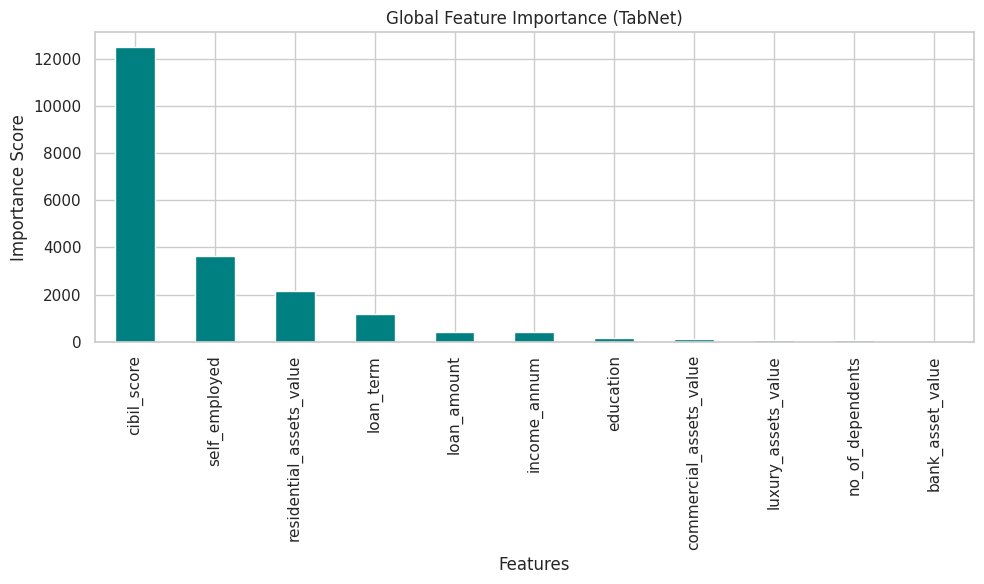

In [ ]:
# Step 5: Feature Importance Analysis
# Generate explanations for the test dataset
explanations = tabnet.explain(X_test.values)

# Print global feature importance
print("\n=== TabNet Feature Importances ===")
feature_importance_tabnet = tabnet.feature_importances_
for name, importance in zip(X.columns, feature_importance_tabnet):
    print(f"{name}: {importance:.4f}")

# Step 6: Visualize Global Feature Importance
# Aggregate feature importances from explanations
global_feature_importance = np.sum(explanations[0], axis=0)  # Sum across all test samples
feature_importance_series = pd.Series(global_feature_importance, index=X.columns)

# Sort and plot
feature_importance_sorted = feature_importance_series.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar', color='teal', title="Global Feature Importance (TabNet)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



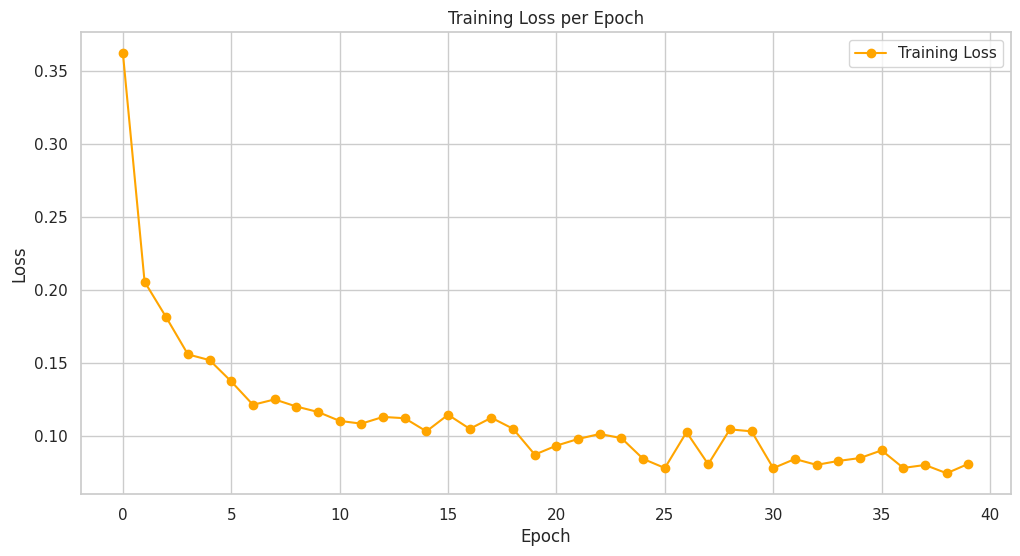

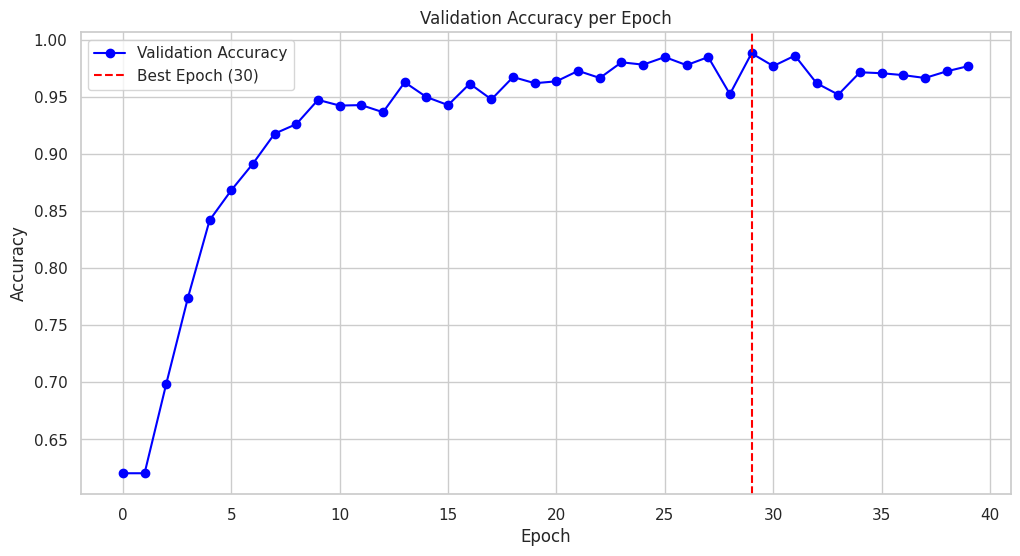

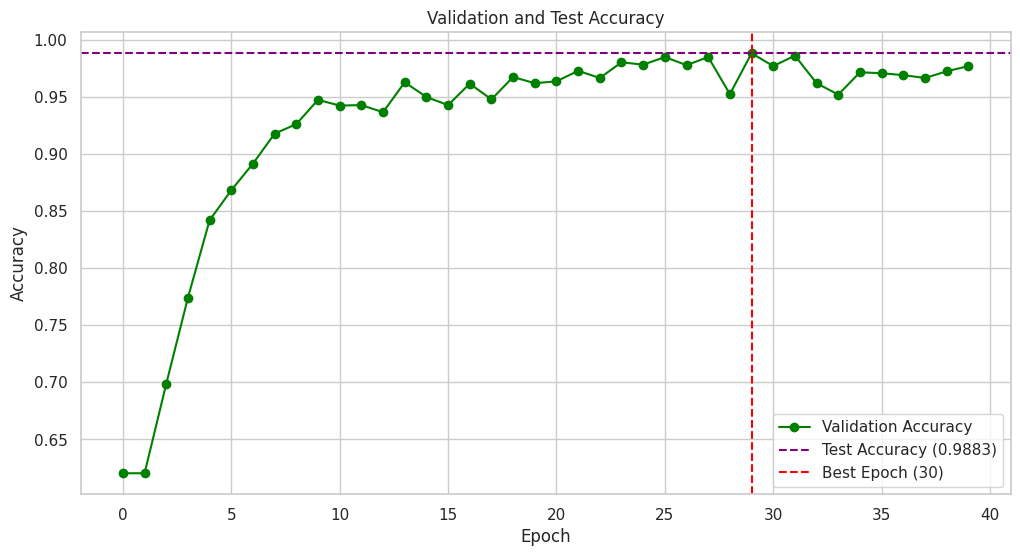

In [ ]:

# Step 6: Visualize Training and Validation Metrics
history = tabnet.history
epochs = len(history['loss'])
val_accuracies = history['test_accuracy']
best_epoch = np.argmax(val_accuracies)

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), history['loss'], label="Training Loss", marker='o', color='orange')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='blue')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Accuracy (alongside Validation Accuracy)
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='green')
plt.axhline(test_accuracy, color='purple', linestyle='--', label=f"Test Accuracy ({test_accuracy:.4f})")
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


#SHAP Post-hoc Model INTERPRETABILITY

In [ ]:
pip install shap

In [ ]:
print(f"X_test shape: {X_test[:100].shape}")
print(f"Number of feature names: {len(feature_names)}")

X_test shape: (100, 11)
Number of feature names: 11


The shap.Explainer might not fully support TabNet directly. Instead of shap.Explainer, We used shap.KernelExplainer as a fallback.

In [ ]:
print(type(X_test))
print(X_test.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


Explaining TabNet Classifier Decision for Target 'loan-status':


  0%|          | 0/100 [00:00<?, ?it/s]

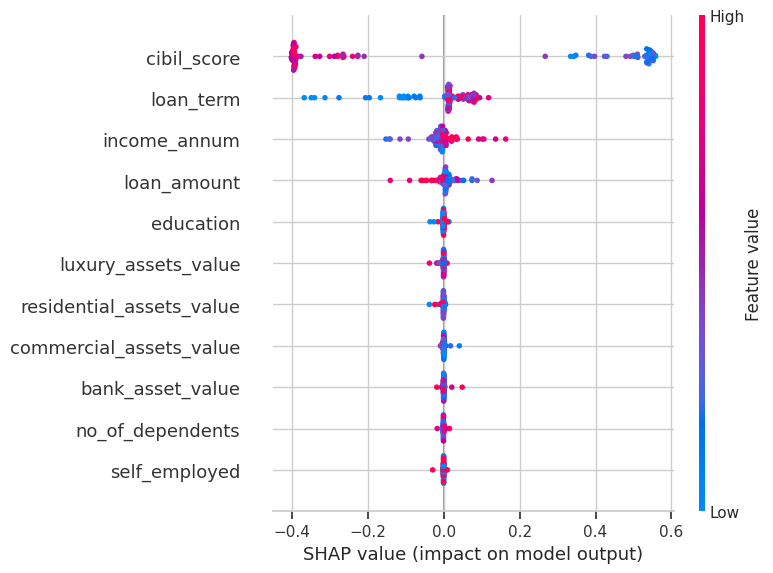


Explaining individual predictions:
Explanation for test instance 1:


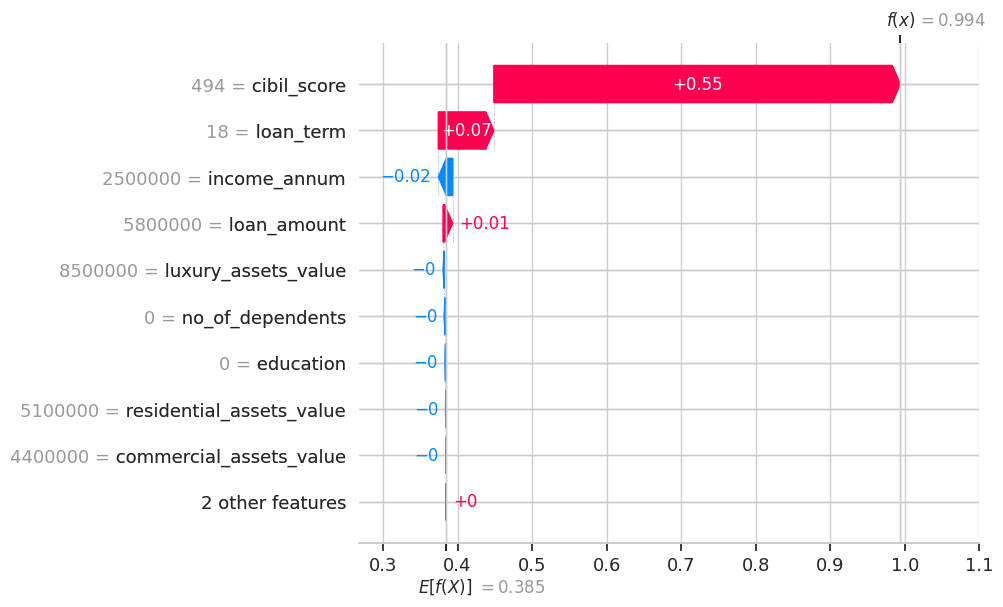

Explanation for test instance 2:


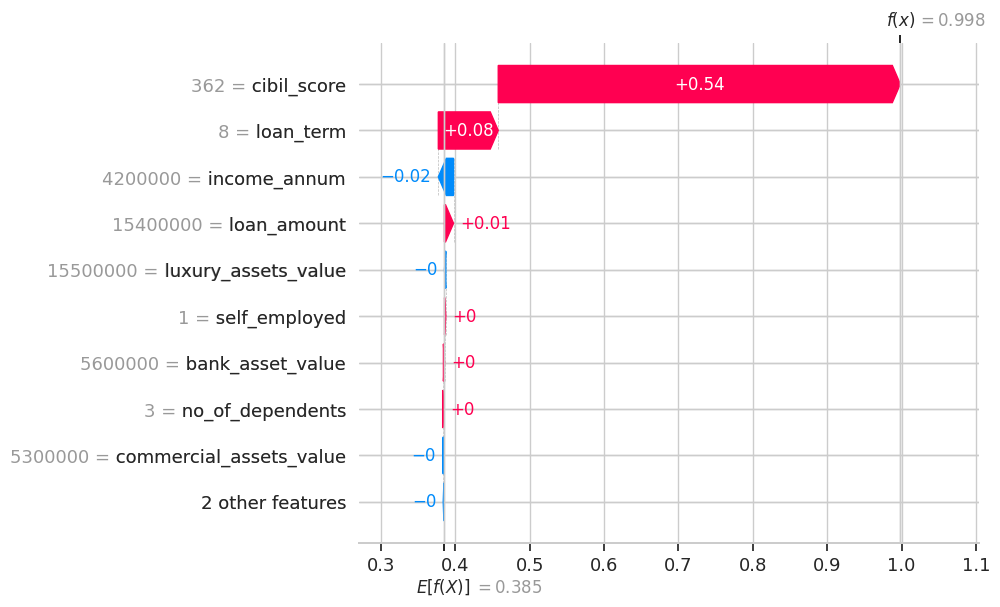

Explanation for test instance 3:


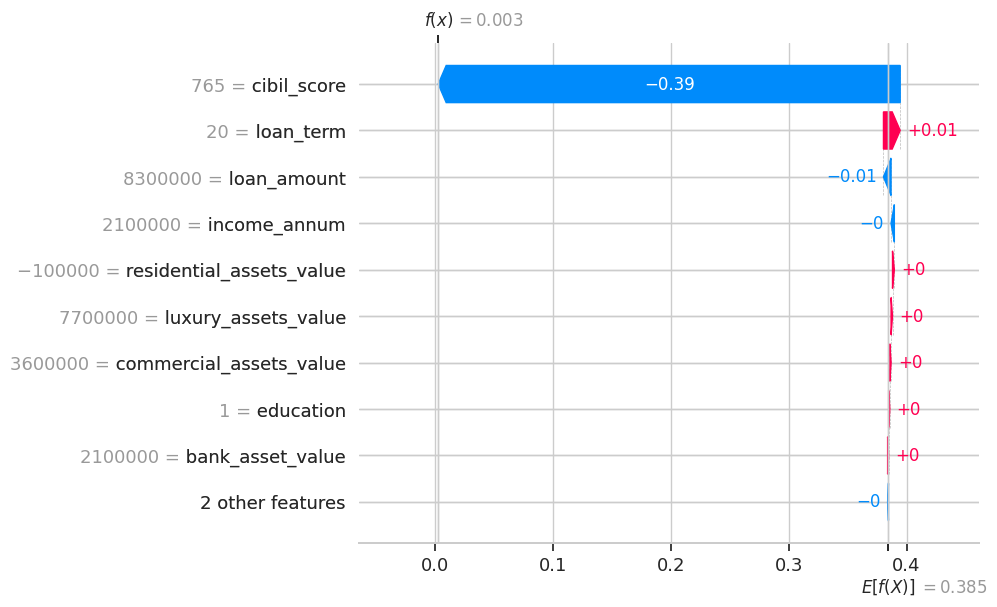

In [ ]:
import shap
import numpy as np
import pandas as pd

# For TabNet Model Feature Importance
# -----------------------------------
print("Explaining TabNet Classifier Decision for Target 'loan-status':")

# Ensure X_test is compatible with SHAP (convert to NumPy array if necessary)
if isinstance(X_test, pd.DataFrame):
    X_test_array = X_test.to_numpy()  # Convert to NumPy array for consistent handling
else:
    X_test_array = X_test

# Define feature names
feature_names = [
    'no_of_dependents', 'education', 'self_employed', 'income_annum',
    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value' ,'commercial_assets_value','luxury_assets_value','bank_asset_value'
]

# Validate feature names length matches X_test's columns
assert len(feature_names) == X_test_array.shape[1], "Feature names do not match the number of columns in X_test!"

# Initialize SHAP Explainer for TabNet
# tabnet_explainer = shap.Explainer(tabnet.predict_proba, X_resampled)
tabnet_explainer = shap.KernelExplainer(tabnet.predict_proba, X_resampled[:100])


# Compute SHAP values for a subset of the test data
shap_values_tabnet = tabnet_explainer(X_test_array[:100])  # Correct function call


# Class Index for 'loan-status' (assuming binary classification: 0 = denied, 1 = approved)
class_index = 1  # Targeting 'approved' class

# Summary plot for SHAP values (explains global feature importance for the target class)
shap.summary_plot(
    shap_values_tabnet[:, :, class_index],  # SHAP values for the 'approved' class
    X_test_array[:100],  # Input test data
    feature_names=feature_names  # Feature names
)

# Example-specific Explanation (explains individual predictions)
print("\nExplaining individual predictions:")
for i in range(3):  # Show explanations for the first 3 test samples
    print(f"Explanation for test instance {i+1}:")
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_tabnet[i, :, class_index],  # SHAP values for class `class_index`
            base_values=shap_values_tabnet.base_values[i, class_index],  # Base value for class `class_index`
            data=X_test_array[i],  # Ensure row is from NumPy array
            feature_names=feature_names
        )
    )
